In [ ]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('Wholesale customers data.csv')

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.preprocessing import normalize
#Normalizing data because we have imbalance data in 0-10, 100s, 1000s, 100000s

In [ ]:
data_scaled = normalize(df)

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns= df.columns)

In [ ]:
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [ ]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


Text(0, 0.5, 'Eucleadean Distance')

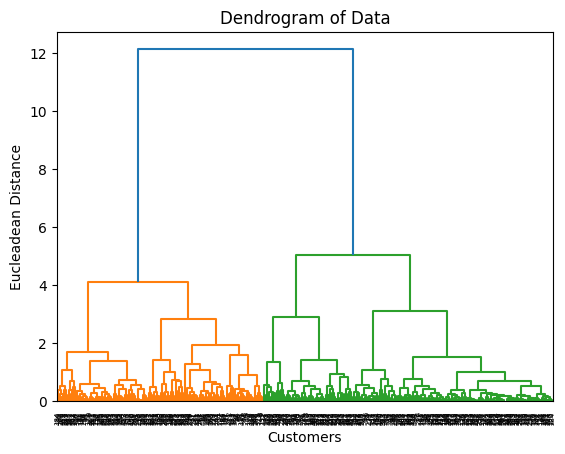

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = "ward"))
plt.title("Dendrogram of Data")
plt.xlabel("Customers")
plt.ylabel("Eucleadean Distance")

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_hc = hc.fit_predict(data_scaled)

#AgglomerativeClustering is defined as a hierarchical clustering

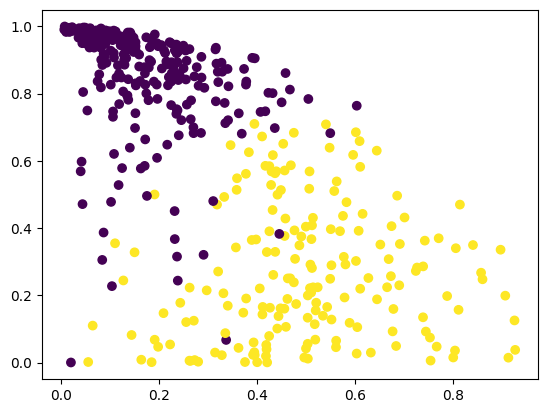

In [ ]:
plt.scatter(data_scaled['Milk'], data_scaled['Fresh'], c = hc.labels_)


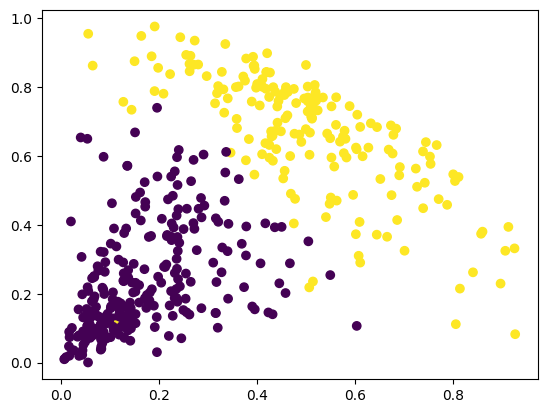

In [ ]:
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c = hc.labels_)

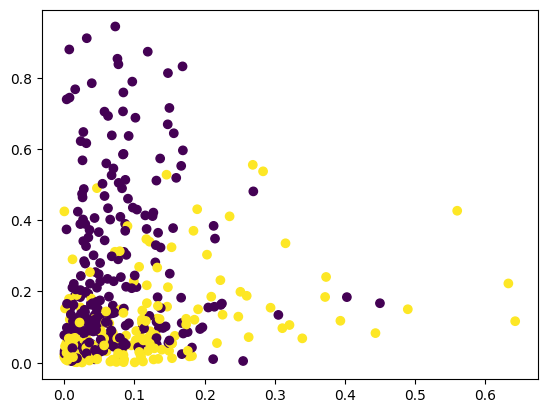

In [ ]:
plt.scatter(data_scaled['Delicassen'], data_scaled['Frozen'], c = hc.labels_)

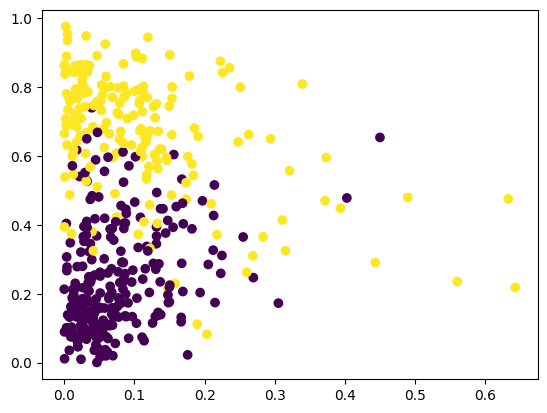

In [ ]:
plt.scatter(data_scaled['Delicassen'], data_scaled['Grocery'], c = hc.labels_)

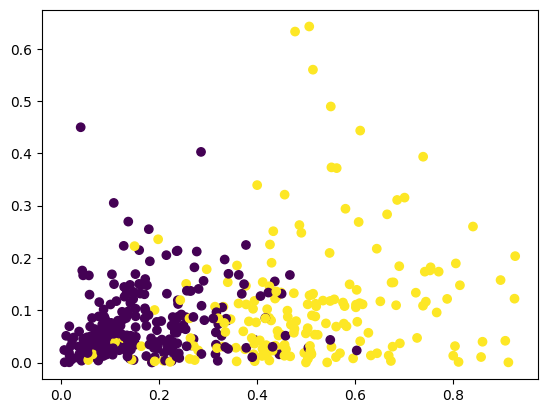

In [ ]:
plt.scatter(data_scaled['Milk'], data_scaled['Delicassen'], c = hc.labels_)
